In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge

# Load the dataset
data = pd.read_csv(r"C:\Users\admin\Downloads\MLR\MLR\ToyotaCorolla - MLR.csv")

# Encode categorical features
le = LabelEncoder()
data['Fuel_Type'] = le.fit_transform(data['Fuel_Type'])
data['Automatic'] = le.fit_transform(data['Automatic'])

# Split the data into training and testing sets
X = data.drop('Price', axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: All Features
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

# Model 2: Feature Selection
X_train_reduced = X_train[['Age_08_04', 'KM', 'HP', 'cc']]
X_test_reduced = X_test[['Age_08_04', 'KM', 'HP', 'cc']]
model2 = LinearRegression()
model2.fit(X_train_reduced, y_train)
y_pred2 = model2.predict(X_test_reduced)

# Model 3: Feature Transformation
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model3 = LinearRegression()
model3.fit(X_train_poly, y_train)
y_pred3 = model3.predict(X_test_poly)

# Evaluate models
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)
print("Model 1:")
print("Mean Squared Error:", mse1)
print("R-squared:", r2_1)

# Apply Lasso and Ridge Regression
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)


Model 1:
Mean Squared Error: 2096851.1400177048
R-squared: 0.8428476112018002


In [1]:
# Explanation of Normalization & Standardization
print("\nNormalization scales data to a fixed range (0,1), while Standardization transforms data to have zero mean and unit variance.")
print("\nStandardization is useful for regression models to ensure features contribute equally and improve numerical stability.")

# Explanation of Multicollinearity Handling
print("\nTechniques to address multicollinearity:")
print("1. Variance Inflation Factor (VIF) to detect high correlation between features.")
print("2. Removing correlated features based on a correlation matrix.")
print("3. Principal Component Analysis (PCA) to reduce dimensionality.")
print("4. Ridge Regression (L2 Regularization) to shrink coefficients.")
print("5. Lasso Regression (L1 Regularization) to eliminate some features.")


Normalization scales data to a fixed range (0,1), while Standardization transforms data to have zero mean and unit variance.

Standardization is useful for regression models to ensure features contribute equally and improve numerical stability.

Techniques to address multicollinearity:
1. Variance Inflation Factor (VIF) to detect high correlation between features.
2. Removing correlated features based on a correlation matrix.
3. Principal Component Analysis (PCA) to reduce dimensionality.
4. Ridge Regression (L2 Regularization) to shrink coefficients.
5. Lasso Regression (L1 Regularization) to eliminate some features.


In [1]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\admin\Downloads\MLR\MLR\ToyotaCorolla - MLR.csv"
df = pd.read_csv(file_path)

# Display basic information and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


(None,
    Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
 0  13500         23  46986    Diesel  90          0  2000      3          4   
 1  13750         23  72937    Diesel  90          0  2000      3          4   
 2  13950         24  41711    Diesel  90          0  2000      3          4   
 3  14950         26  48000    Diesel  90          0  2000      3          4   
 4  13750         30  38500    Diesel  90          0  2000      3          4   
 
    Gears  Weight  
 0      5    1165  
 1      5    1165  
 2      5    1165  
 3      5    1165  
 4      5    1170  )

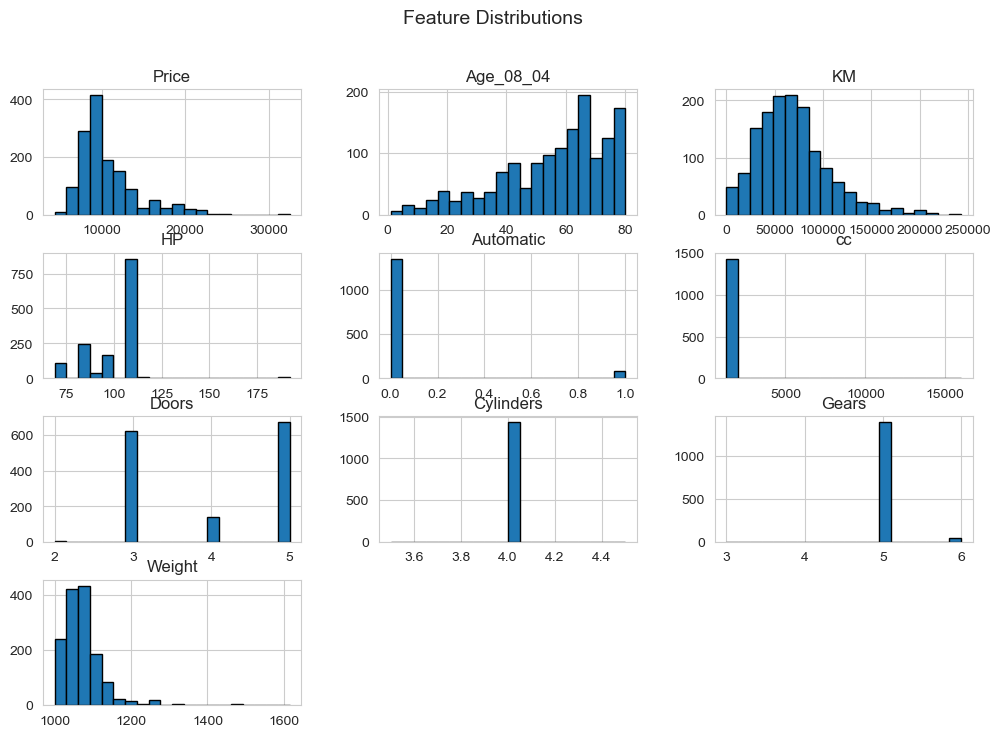

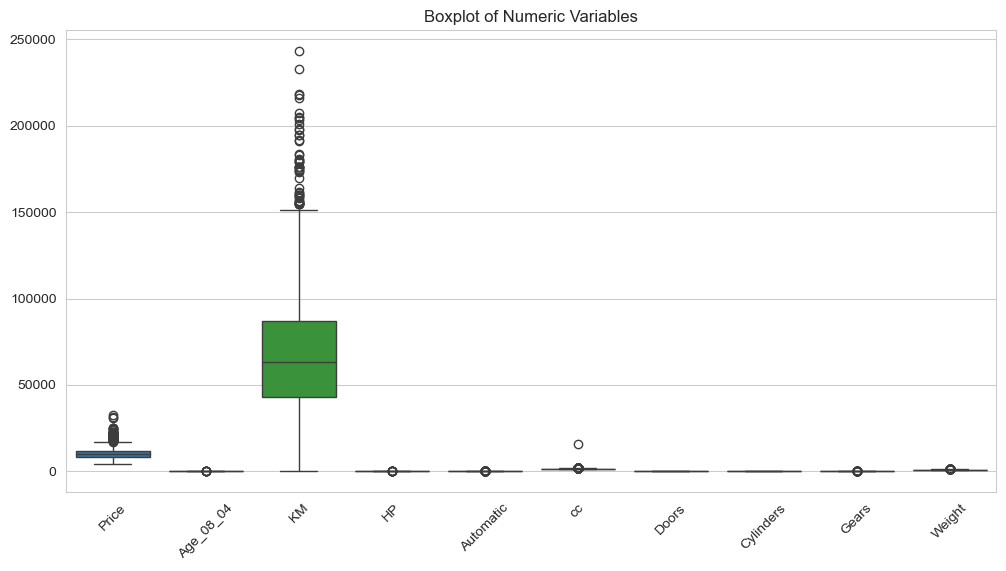

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Summary statistics
summary_stats = df.describe()

# Plot histograms for numerical variables
df.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

# Boxplot for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=["Fuel_Type"]))  
plt.xticks(rotation=45)
plt.title("Boxplot of Numeric Variables")
plt.show()

summary_stats


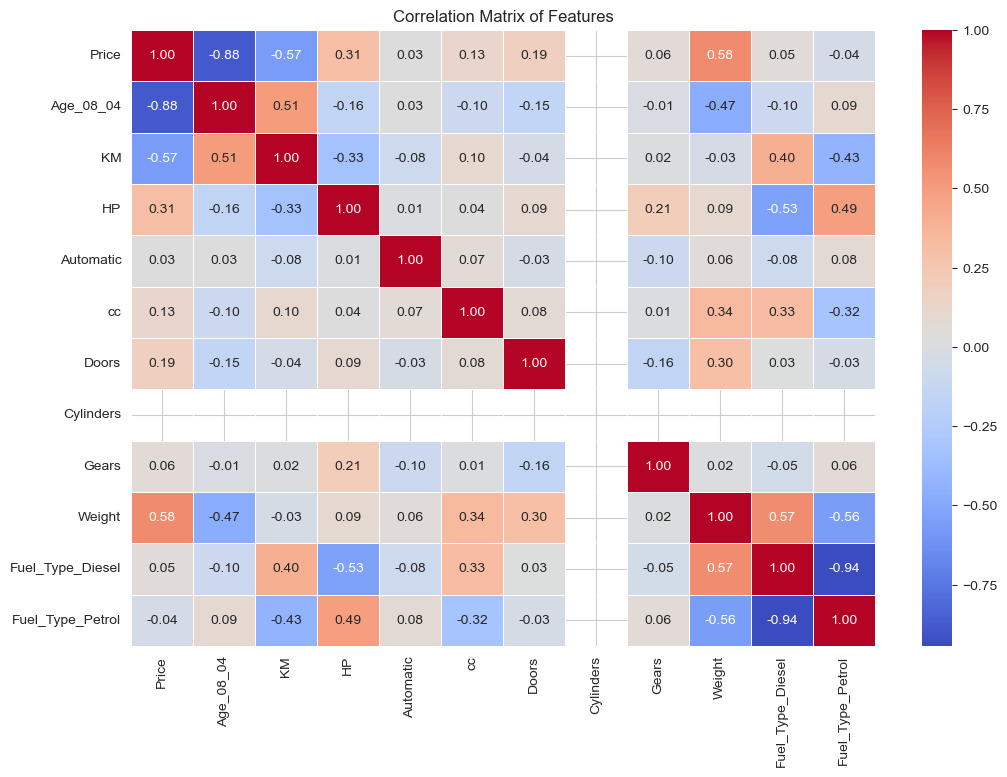

In [3]:
# Encoding categorical variable 'Fuel_Type' using one-hot encoding
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

# Compute correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()


In [4]:
# Identifying outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Defining lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Finding outliers
outliers = ((df < lower_bound) | (df > upper_bound)).sum()

# Display number of outliers per column
outliers


Price               110
Age_08_04             7
KM                   49
HP                   11
Automatic            80
cc                  123
Doors                 0
Cylinders             0
Gears                46
Weight               66
Fuel_Type_Diesel    155
Fuel_Type_Petrol    172
dtype: int64

In [5]:
# Capping outliers at 1st and 99th percentile
for col in ["Price", "KM", "cc", "Weight"]:
    lower_limit = df[col].quantile(0.01)
    upper_limit = df[col].quantile(0.99)
    df[col] = df[col].clip(lower=lower_limit, upper=upper_limit)

# Verify if outliers are reduced
new_outliers = ((df < lower_bound) | (df > upper_bound)).sum()
new_outliers


Price               110
Age_08_04             7
KM                   49
HP                   11
Automatic            80
cc                  123
Doors                 0
Cylinders             0
Gears                46
Weight               66
Fuel_Type_Diesel    155
Fuel_Type_Petrol    172
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=["Price"])  # Features
y = df["Price"]  # Target variable

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the split datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1148, 11), (288, 11), (1148,), (288,))

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train a basic multiple linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Display results
mae, mse, rmse, r2


(888.9216819025836, 1372022.7755441973, 1171.3337592437936, 0.8820579704665981)

In [8]:
from sklearn.linear_model import Ridge

# Initialize and train Ridge regression model
ridge_model = Ridge(alpha=1.0)  # Regularization strength set to 1.0
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate Ridge model performance
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mse_ridge ** 0.5
r2_ridge = r2_score(y_test, y_pred_ridge)

# Display results
mae_ridge, mse_ridge, rmse_ridge, r2_ridge


(889.9784614991897, 1375113.2637497475, 1172.6522347864893, 0.8817923054516226)

In [9]:
from sklearn.linear_model import Lasso

# Initialize and train Lasso regression model
lasso_model = Lasso(alpha=0.1)  
lasso_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate Lasso model performance
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = mse_lasso ** 0.5
r2_lasso = r2_score(y_test, y_pred_lasso)

# Display results
mae_lasso, mse_lasso, rmse_lasso, r2_lasso


(889.0650635996576, 1372488.144992335, 1171.5323917810958, 0.8820179663076478)

In [10]:
# Extracting feature importance from Lasso model
lasso_coefficients = pd.Series(lasso_model.coef_, index=X.columns)

# Displaying non-zero coefficients (features selected by Lasso)
lasso_coefficients[lasso_coefficients != 0].sort_values(ascending=False)


Fuel_Type_Petrol    1396.778718
Fuel_Type_Diesel    1172.107192
Gears                479.265507
Automatic             97.128472
HP                    29.396364
Weight                28.601547
KM                    -0.014715
cc                    -2.586055
Doors                -75.372573
Age_08_04           -117.103811
dtype: float64